<a href="https://colab.research.google.com/github/Abo3adel/House-s-price-prediction/blob/main/weekly_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as mms , StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import  train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.shape

(545, 13)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df["area"].value_counts()

,count
area,
6000,24
3000,14
4500,13
4000,11
6600,9
...,...
3360,1
1700,1
3649,1


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
features_array = [
    "bedrooms",
    "bathrooms",
    "stories",
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "parking",
    "prefarea",
    "furnishingstatus",
    "area_scaled"
]

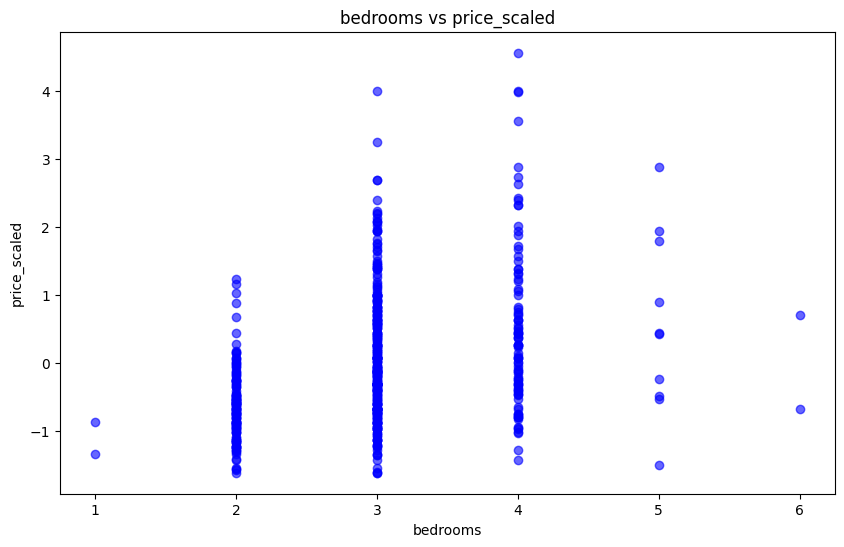

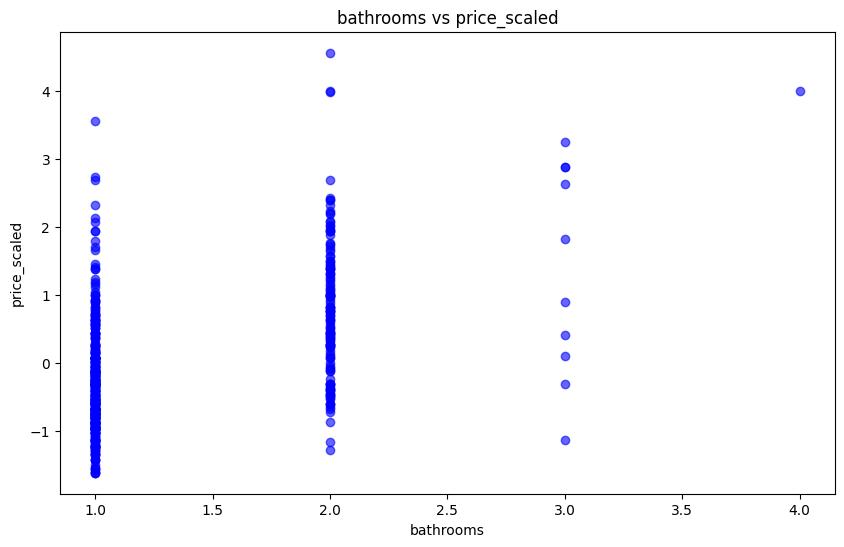

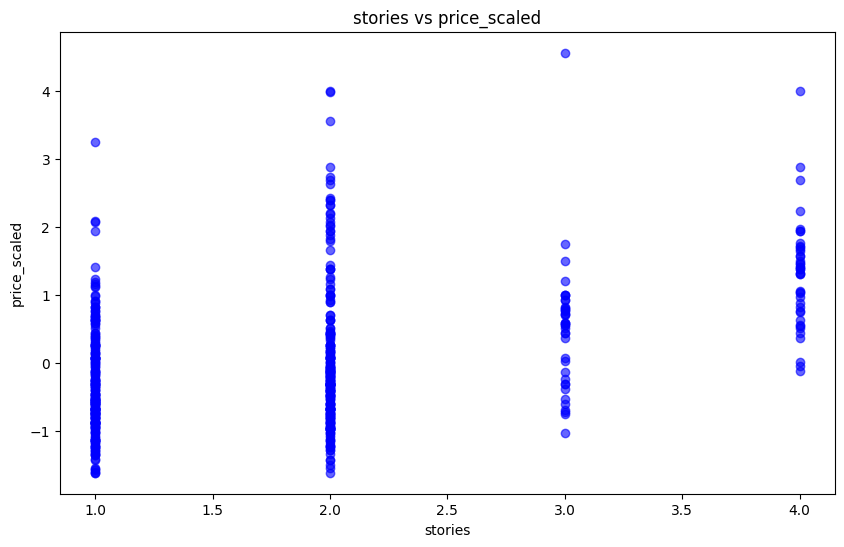

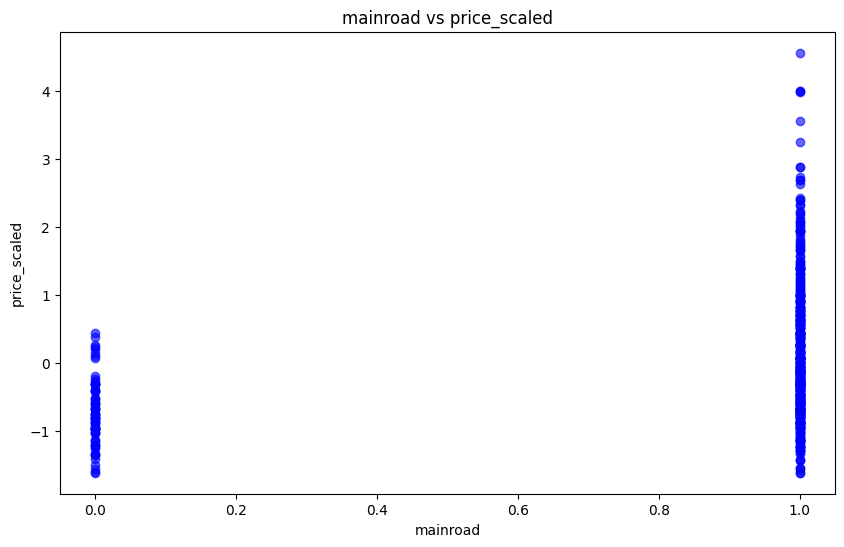

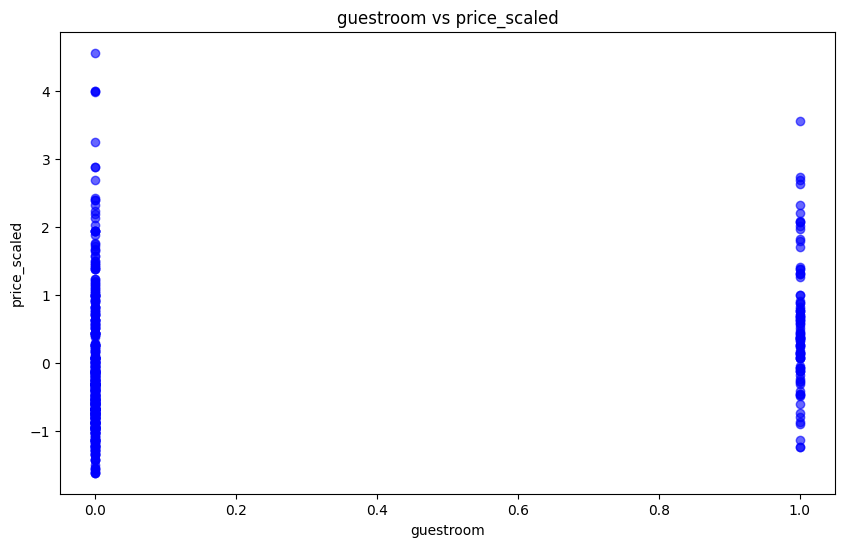

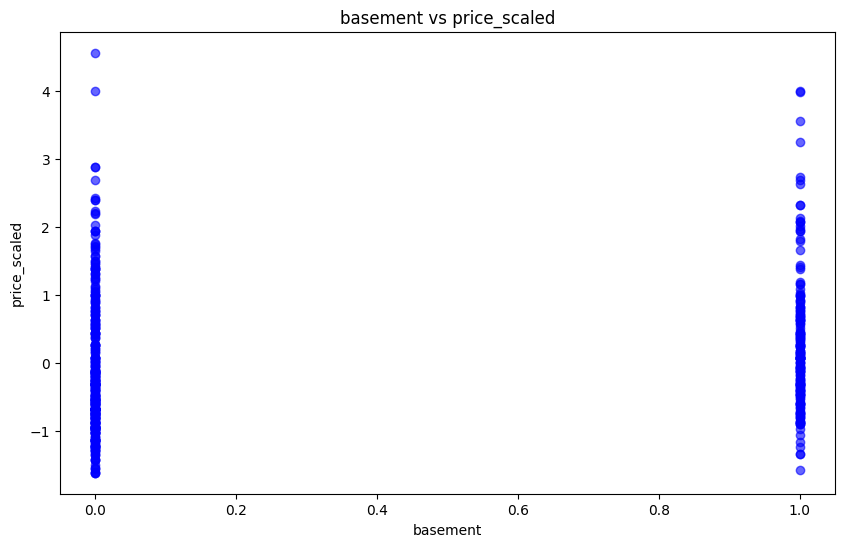

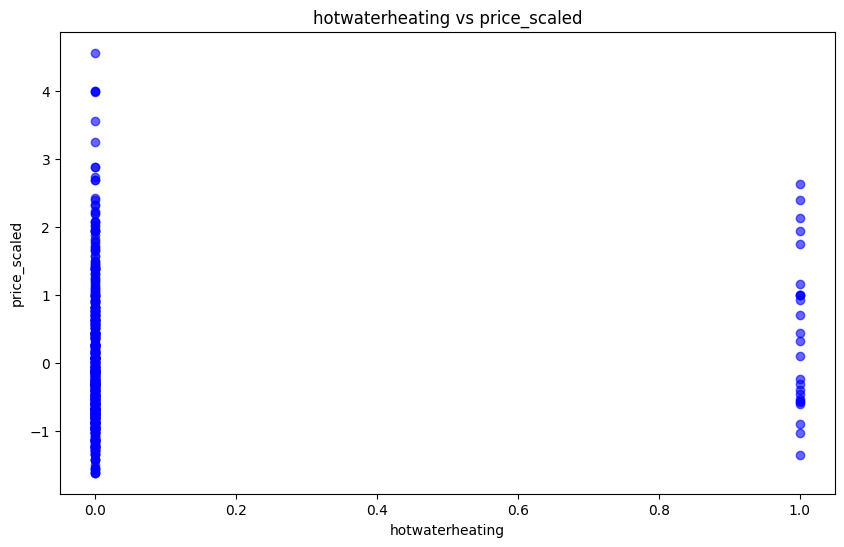

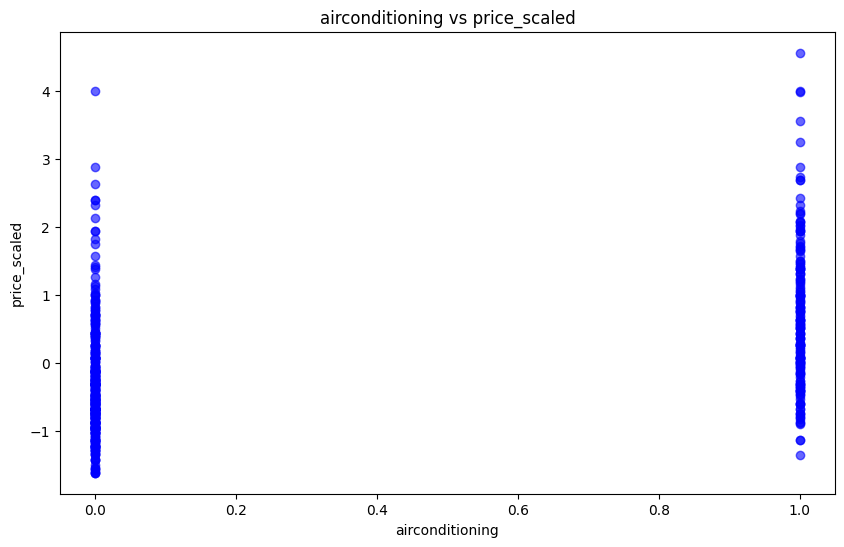

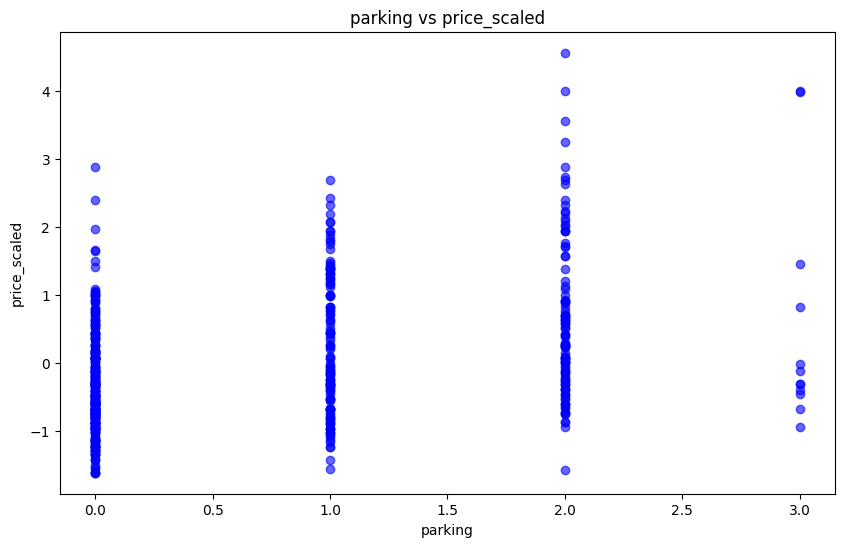

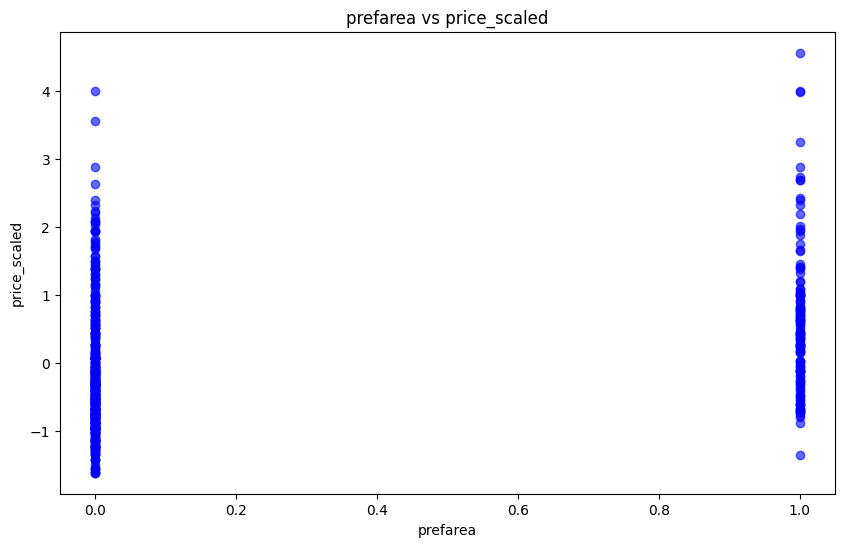

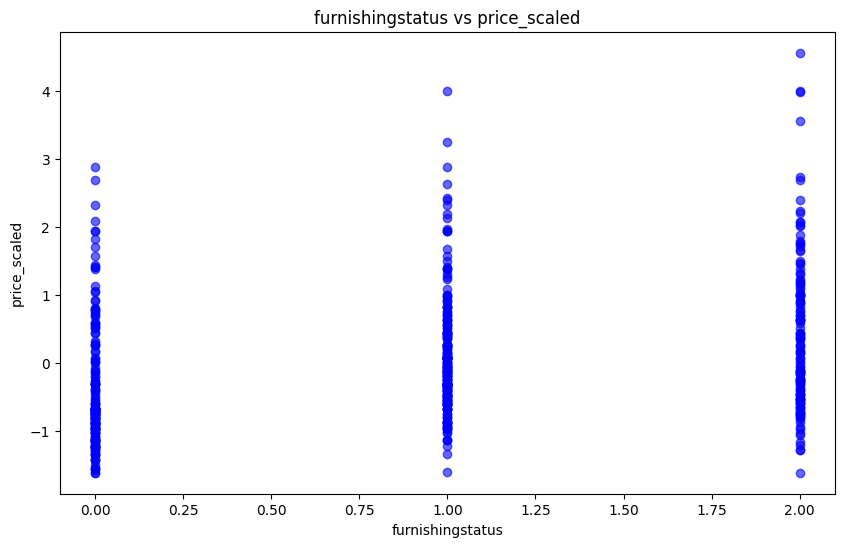

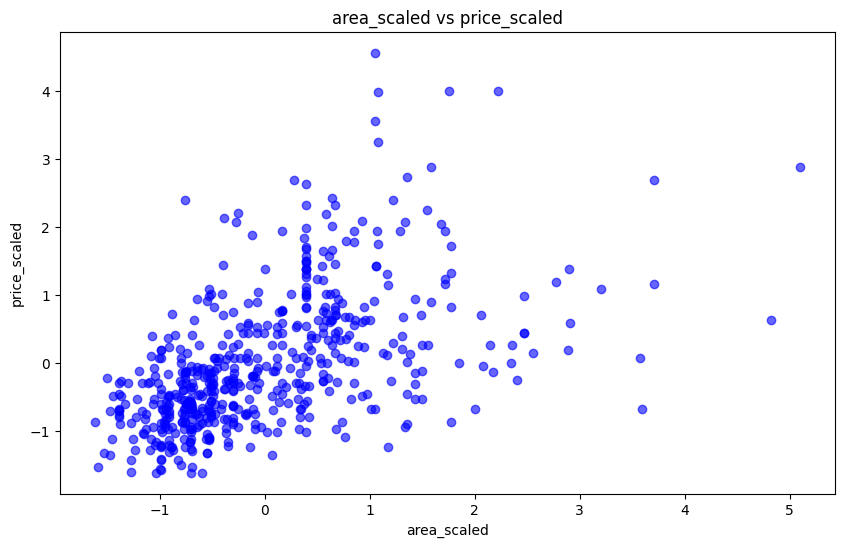

In [ ]:
for feature in features_array:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['price_scaled'], color='blue', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('price_scaled')
    plt.title(f'{feature} vs price_scaled')
    plt.show()

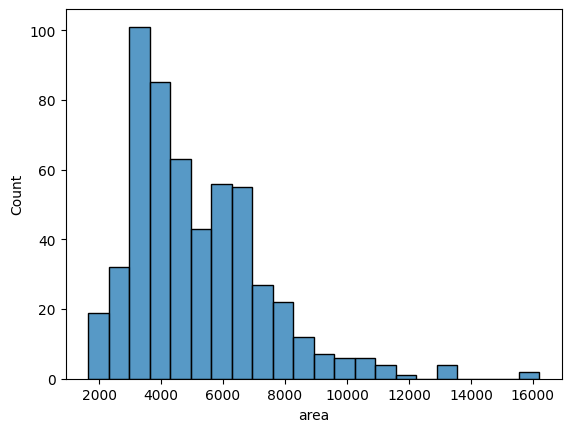

In [ ]:
sns.histplot(df['area'])
plt.show()

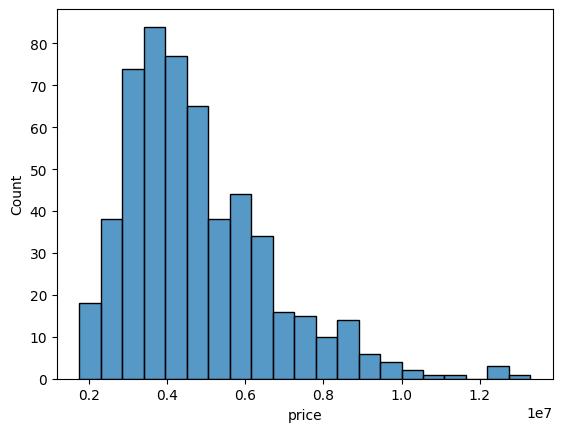

In [ ]:
sns.histplot(df['price'])
plt.show()

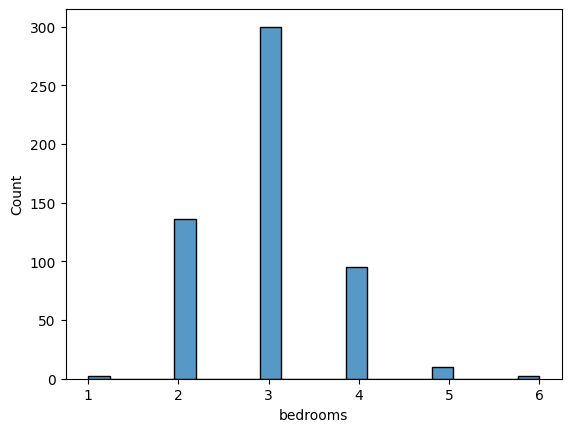

In [ ]:
sns.histplot(df['bedrooms'])
plt.show()

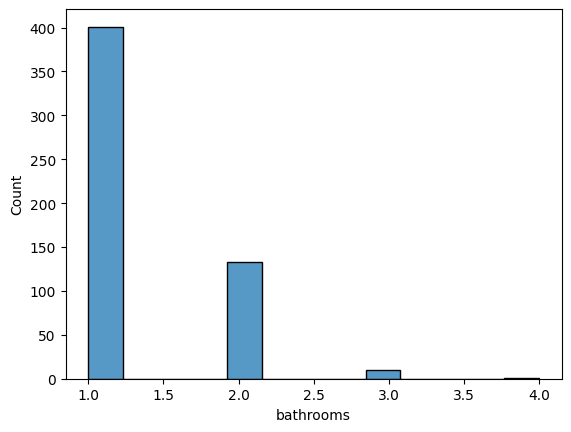

In [ ]:
sns.histplot(df['bathrooms'])
plt.show()

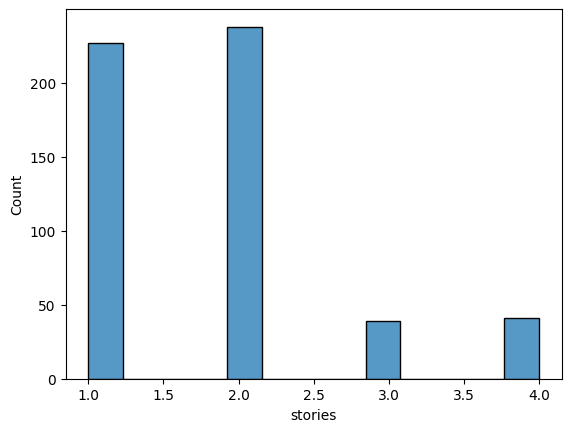

In [ ]:
sns.histplot(df['stories'])
plt.show()

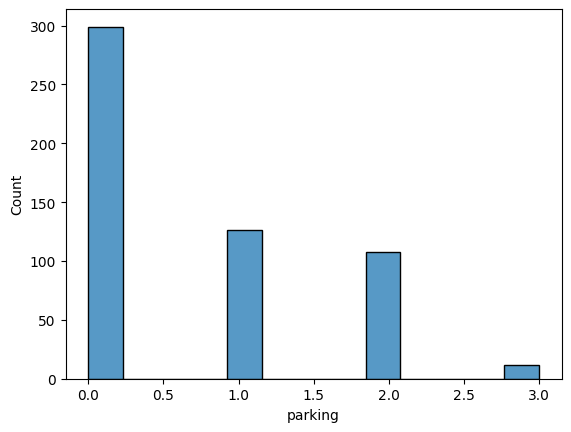

In [ ]:
sns.histplot(df['parking'])
plt.show()

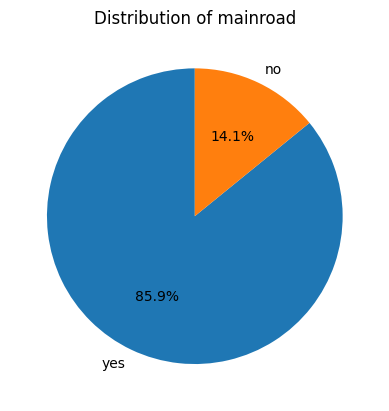

In [ ]:
pie_chart = df['mainroad'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of mainroad")
plt.show()

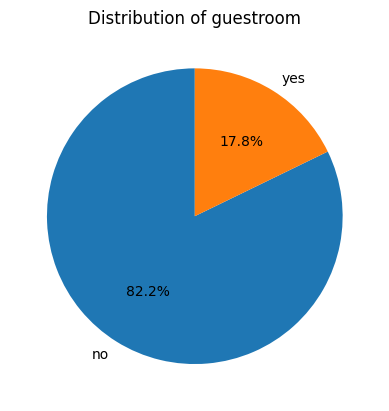

In [ ]:
pie_chart = df['guestroom'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of guestroom")
plt.show()

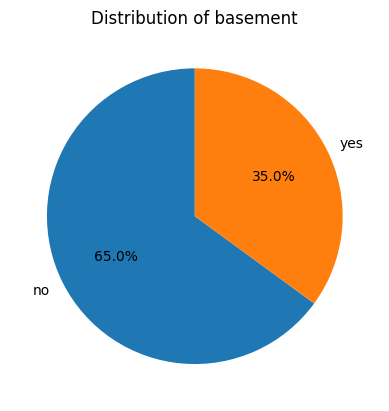

In [ ]:
pie_chart = df['basement'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of basement")
plt.show()

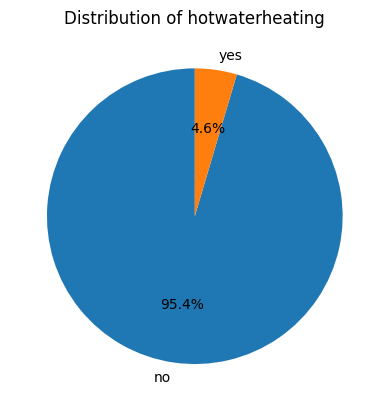

In [ ]:
pie_chart = df['hotwaterheating'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of hotwaterheating")
plt.show()

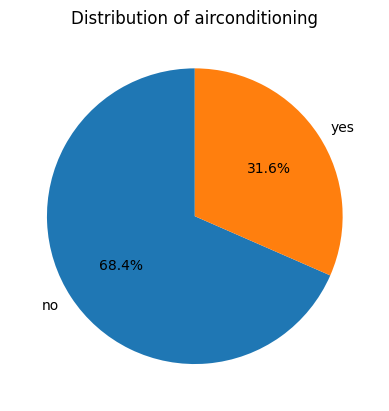

In [ ]:
pie_chart = df['airconditioning'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of airconditioning")
plt.show()

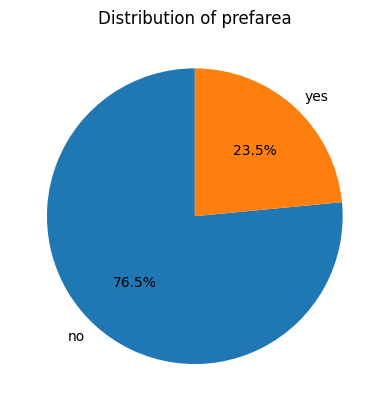

In [ ]:
pie_chart = df['prefarea'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of prefarea")
plt.show()

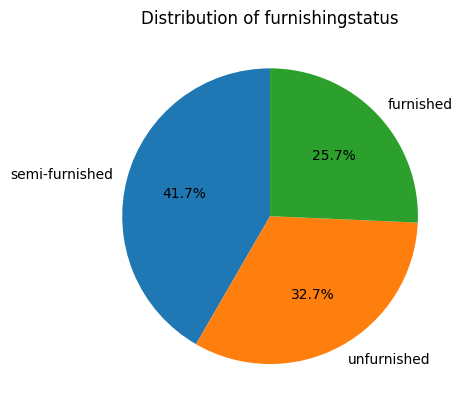

In [ ]:
pie_chart = df['furnishingstatus'].value_counts()


plt.pie(
    pie_chart,
    labels=pie_chart.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title("Distribution of furnishingstatus")
plt.show()

In [ ]:
df["furnishingstatus"] = df["furnishingstatus"].map({'unfurnished': 0, 'semi-furnished': 1,"furnished":2})

In [ ]:
encode_col=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in encode_col:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


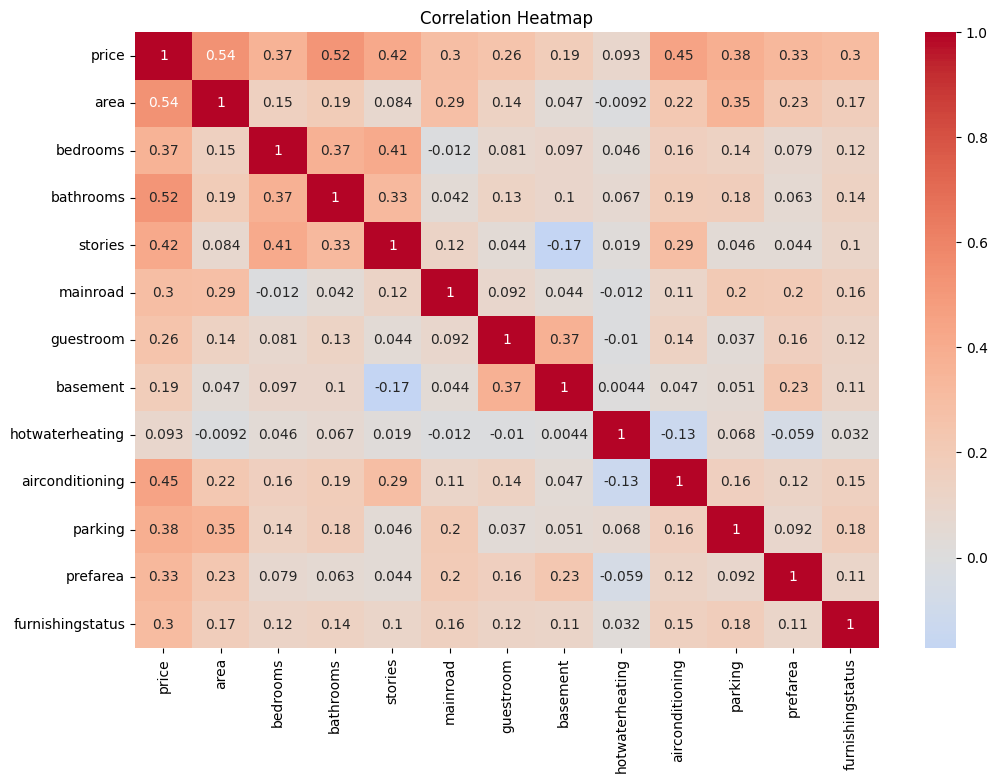

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Scaler= ss()
df['price_scaled'] = Scaler.fit_transform(df[['price']])
df['area_scaled'] = Scaler.fit_transform(df[['area']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_scaled,area_scaled
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,4.566365,1.046726
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,4.004484,1.757010
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,4.004484,2.218232
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,3.985755,1.083624
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,3.554979,1.046726


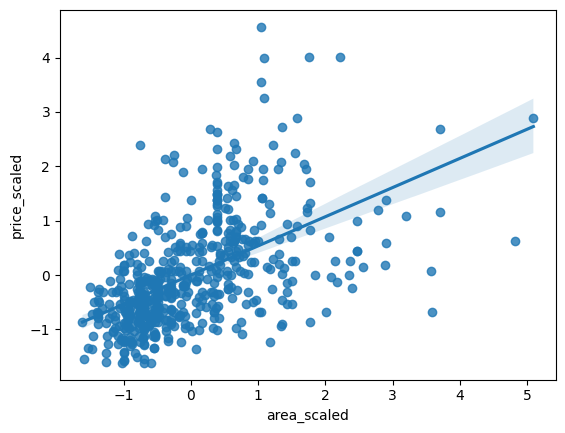

In [ ]:
sns.regplot(x='area_scaled',y='price_scaled',data=df)
plt.show()

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_scaled',
       'area_scaled'],
      dtype='object')

In [ ]:
  X = df.drop(['price', 'price_scaled','area_scaled'], axis=1).copy()

  X['area_squared'] = X['area'] ** 2
  X['area_squared'] = Scaler.fit_transform(X[['area_squared']])

  X.drop('area', axis=1, inplace=True)

  y = df['price_scaled']

  X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

  model = lr()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mse_test = mse(y_test, y_pred)
  rmse_test = mse_test** 0.5
  r2_test = r2(y_test, y_pred)

print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")
print("model csore",model.score(X_train,y_train))

Test RMSE: 0.67, R²: 0.64
model csore 0.6766109567496443


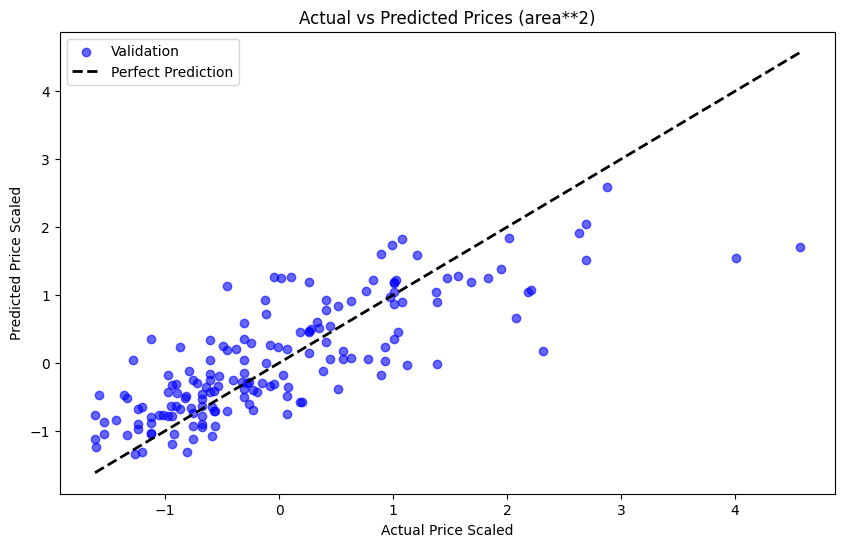

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Validation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs Predicted Prices (area**2)")
plt.legend()
plt.show()

In [ ]:
X = df.drop(['price', 'price_scaled','area_scaled'], axis=1).copy()

X['area_squared'] = X['area'] ** 3
X['area_squared'] = Scaler.fit_transform(X[['area_squared']])

X.drop('area', axis=1, inplace=True)

y = df['price_scaled']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

model = lr()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_test = mse(y_test, y_pred)
rmse_test = mse_test** 0.5
r2_test = r2(y_test, y_pred)

print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")
print("model csore",model.score(X_train,y_train))

Test RMSE: 0.67, R²: 0.63
model csore 0.6606884911129054


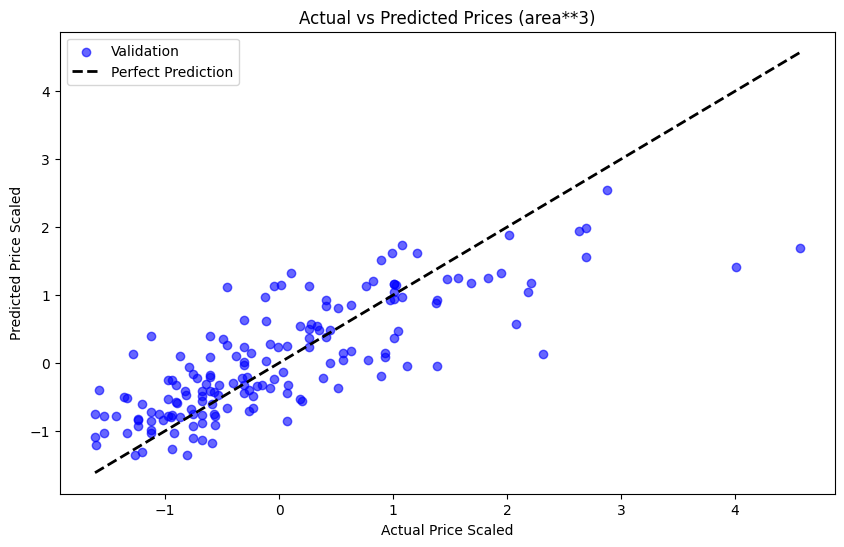

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Validation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs Predicted Prices (area**3)")
plt.legend()
plt.show()

In [ ]:
columns = list(df.columns)
columns.remove('price')
columns.remove('price_scaled')
columns.remove('area')

model = lr()
X = df[columns]
y = df['price_scaled']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = tts(X_test, y_test, test_size=0.5, random_state=42)

model.fit(X_train, y_train)
print("model score",model.score(X_train,y_train))
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

mse_valid = mse(y_valid, y_pred_valid)
rmse_valid = mse_valid ** 0.5
mse_test = mse(y_test, y_pred_test)
rmse_valid = mse_test ** 0.5

model score 0.6854429472843789


In [ ]:
print("RMSE Validasi:", rmse_valid)
print("RMSE Test:", rmse_valid)

RMSE Validasi: 0.7221455351372473
RMSE Test: 0.7221455351372473


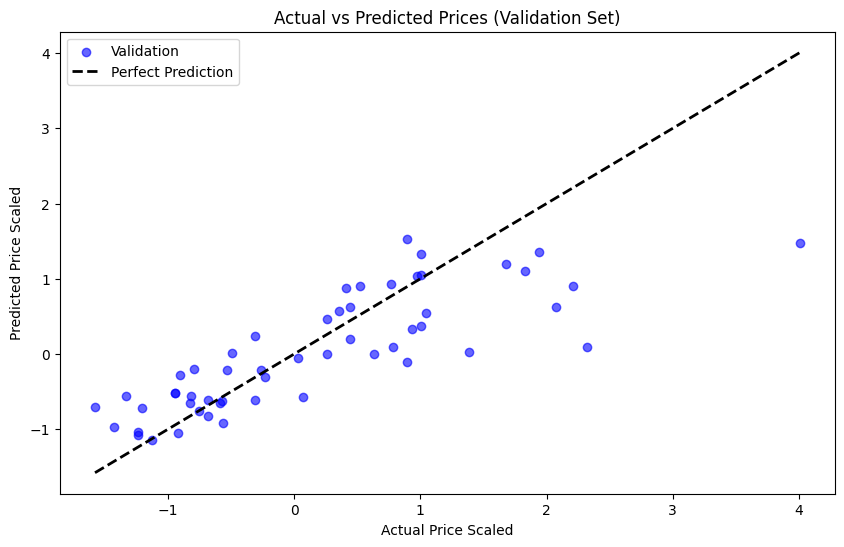

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred_valid, color='blue', alpha=0.6, label='Validation')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs Predicted Prices (Validation Set)")
plt.legend()
plt.show()



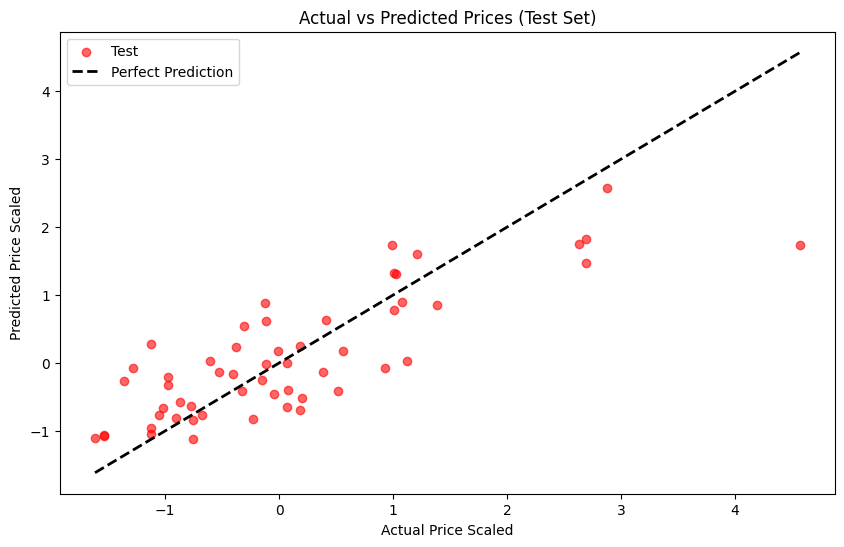

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='red', alpha=0.6, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.legend()
plt.show()